# 가설검정

> "작성 중"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [python, R, statistics]

`-` 대표적인 확률분포에 대한 간단한 정리를 마친 후 작성할 예정임 ---> 시작

`-` 참고: Statistics: Unlocking the power of data, Robin Lock 외 4인

# 중심극한정리(central limit theorem)

`-` 동일한 확률분포를 가진 독립확률변수 $n$개의 평균의 분포는 충분히 크다면($n\geq 30$이면) 정규분포에 가까워짐

`-` 앞으로 많은 가설검정에서 사용될 예정

`-` 증명 링크 : https://en.wikipedia.org/wiki/Central_limit_theorem#Proof_of_classical_CLT

# 붓스트랩과 p-값

`-` 뒤에서 설명할 내용들에 붓스트랩과 p-값의 개념이 쓰여서 알고가자

`-` 이를 위해 간단한 예시를 들어보자

`-` 전북대학교 학생들의 평균 맥박수가 모종의 이유로 궁금하다고 해보자(표본조사론 프로젝트? ㅋㅋ)

`-` 제일 먼저 떠오르는 생각은 전북대학교 학생들을 전부 불러모아 맥박을 측정하고 이를 평균내는 것이다

`-` 확실한 방법이지만 일일이 맥박을 어느 세월에 측정할 것인가...

`-` 그래서 생각한 방법이 모든 학생의 맥박을 측정하는 대신에 일부 학생들의 맥박만 측정하여 평균을 내는 것이다

`-` ??? : 일부 학생들의 맥박 평균과 전체 학생들의 맥박 평균이 같은지 어떻게 확신함??

`-` 국이나 찌개등의 간을 볼 때 조금만 먹어보고 짠지 싱거운지 판단하는데 이는 음식에 간이 골고루 배도록 잘 섞어주었기 때문이다

`-` 만약 간이 골고루 배어있지 않으면 위의 판단은 틀릴 수 있다

`-` 마찬가지로 학생들을 골고루 잘 선택한다면(?) 일부 학생들의 맥박을 가지고 전체 학생들을 대표할 수 있을 것이다  

`-` 골고루 잘 선택하는 방법에는 학생들에게 1번부터 차례차례 번호를 부여하고 시스템을 통해 50개의 번호를 뽑는 것이 있다 

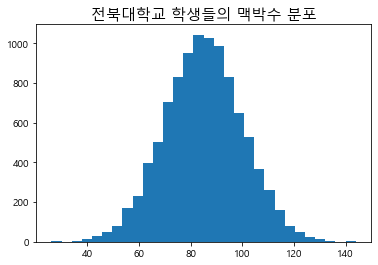

In [7]:
#collapse
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글이 깨지지 않도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False    # 한글이 깨지지 않도록 설정

np.random.seed(42)
blood_pressure = np.random.normal(85, 15, 10000) ## 모집단
plt.hist(blood_pressure, bins=30)
plt.title('전북대학교 학생들의 맥박수 분포', fontsize=15)
plt.show()

`-` 전체 전북대학교 학생들의 맥박(모집단)을 일일이 측정하기 힘드니 임의의로 50명의 학생만 뽑아 맥박을 측정하고 평균을 내자

`-` 모집단은 평균이 85, 표준편차가 15인 정규분포를 따른다고 가정하자

In [8]:
sample = np.random.choice(blood_pressure, size=50, replace=False)
print(f'50명의 평균 맥박수는 {np.round(np.mean(sample), 1)}입니다')

50명의 평균 맥박수는 85.9입니다


`-` 50명을 무작위로 뽑아 맥박을 재고 이를 평균내보니 85.9가 나왔다

`-` 그러면 이제 전북대학교 전체 학생들의 평균 맥박수가 85.9라고 할 수 있을까?

`-` 안타깝게도 그럴 수 없는데 무작위로 50명을 다시 뽑으면 당연하게도 다른 결과가 나오기 때문이다

In [9]:
sample = np.random.choice(blood_pressure, size=50, replace=False)
print(f'50명의 평균 맥박수는 {np.round(np.mean(sample), 1)}입니다')

50명의 평균 맥박수는 83.9입니다


`-` 이번에는 평균이 83.9이다

`-` 위의 결과로부터 2가지 문제점이 생겼다

`-` `첫 번째는 평균 맥박수를 85.9로 해야될지 83.9로 해야될지 모르겠다는 것이고`

`-` `두 번째는 매번 50명씩 학생들의 맥박을 재는것도 쉬운일은 아니라는 것이다`

`-` 일단 첫 번째 문제는 전체 전북대학교 학생들의 평균 맥박수(모평균=모집단의 평균)를 점추정이 아닌 구간추정을 하면 된다

`-` 즉, 모평균을 85.9, 83.9와 같이 하나의 값으로 나타내지 말고 정확히 몇인지는 모르지만 아마도 83에서 87사이인 것 같다와 같은 방식으로 나타내는 것이다  

`-` 그러면 구간은 어떻게 정할 것인지? ---> 50명씩 학생들을 무작위로 뽑아 맥박을 재고 이를 평균낸다 ---> 이를 엄청 많이 반복하자 ---> 표본평균의 분포(표집분포)

`-` 그리고 최소값과 최대값을 기준으로 삼자!

`-` 1000번 정도 반복해보자

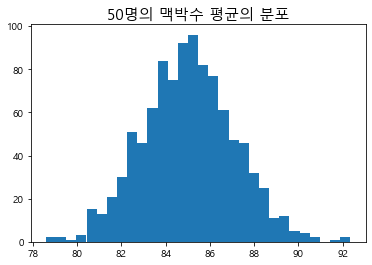

In [10]:
#collapse
np.random.seed(42)
samples = [np.mean(np.random.choice(blood_pressure, size=50, replace=False)) for i in range(1000)]
plt.hist(samples, bins=30)
plt.title('50명의 맥박수 평균의 분포', fontsize=15) 
plt.show()

In [11]:
print(f'구간의 최소값은 {np.round(np.min(samples), 1)}이고 최대값은 {np.round(np.max(samples), 1)}입니다')

구간의 최소값은 78.6이고 최대값은 92.3입니다


`-` `아마도` 전북대학교 학생들의 평균 맥박수는 78.6에서 92.3인 것 같다

`-` 그런데 구간의 경계를 굳이 최소값과 최대값으로 할 필요는 없다

`-` 예컨대 83과 87사이로 해도 된다

`-` 구간의 폭이 좁으면 정확도는 떨어지지만 그만큼 쓸모가 있고 구간의 넓으면 정확도는 높아지지만 쓸모가 없다

`-` 평균 맥박수가 0에서 200사이라고 한다면 정확하지만 쓸모가 없다...

`-` 한편, 정규분포인 경우 중심(평균)에서 표준편차의 2배 거리안에 95%의 데이터가 존재한다

`-` 중심극한정리에 의해 표본크기가 30보다 큰 50이므로 표본평균의 분포(표집분포)는 정규분포를 따른다

`-` 구간을 정한다는 것은 위에서 언급한 `"아마도(= 믿음의 크기)"`를 정한다는 것과 다름이 없다(구간이 넓으면 믿음의 크기가 커지고 좁으면 반대니까)

`-` 구간을 표집분포의 평균에서 표집분포의 표준편차(`표준오차`)의 2배 거리 내부로 정하면 어떨까?(95%의 데이터가 존재)

`-` 위에서 구한 1000개의 표본평균 중에서 95%나 구간안에 속한다!(정확도 높고 쓸모 있음)

`-` 그리고 이러한 구간을 `신뢰구간`이라고 표현한다

`-` 여기서는 95% 신뢰구간!

In [17]:
samples_mean = np.round(np.mean(samples), 1)
samples_std = np.round(np.std(samples, ddof=1), 1)
print(f'표집분포의 평균은 {samples_mean}이고 표준오차는 {samples_std}입니다')

표집분포의 평균은 85.0이고 표준오차는 2.1입니다


`-` 95% 신뢰구간은 표집분포의 평균에서 표준오차의 2배 거리 내부이므로 다음과 같다

In [26]:
print(f'전북대학교 학생들의 평균 맥박수에 대한 95% 신뢰구간은 ({samples_mean - 2*samples_std}, {samples_mean + 2*samples_std}) 입니다')

전북대학교 학생들의 평균 맥박수에 대한 95% 신뢰구간은 (80.8, 89.2) 입니다


`-` 전북대학교 학생들의 평균 맥박수의 95% 신뢰구간을 구했다!

`-` 누군가가 전북대학교 학생들의 평균 맥박수에 몇인지 물어본다면 답변할 수 있다!

`-` 전북대학교 학생들의 평균 맥박수가 몇이죠?? ---> 정확히는 모르지만 80.8에서 89.2사이에 존재함을 95% 신뢰합니다!

`-` 신뢰한다는 표현이 현재로는 애매하게 느껴지지만 일단은 넘어가자

`-` 드디어 전북대학교 학생들의 평균 맥박수가 어느정도인지 말할 수 있게 되었다

`-` 그런데 심각한 문제점이 하나 있다

`-` 위에서 말한 두 번째 문제점이다

`-` `두 번째 문제점 : 매번 50명씩 학생들의 맥박을 재는것도 쉬운일은 아니다`

`-` 위에서 신뢰구간을 구하기 위해 50명의 맥박수를 재는 일을 1000번이나 반복했다

`-` 총 50000명의 맥박수를 측정함...

`-` 우리가 처음에 전북대학교 학생들의 평균 맥박수를 구하기 위해 접근한 방식을 사용하면

`-` 50000명씩 맥박수를 재지 않고 50명의 맥박수만 재는 것으로 신뢰구간을 구할 수 있다

`-` `처음 접근한 방식 : 학생들을 골고루 잘 선택한다면(?) 일부 학생들의 맥박을 가지고 전체 학생들을 대표할 수 있을 것이다`  

`-` 우리는 무작위로 50명의 학생들을 골랐다 ---> 정말 무작위로 학생들을 골랐다면 이들이 전체를 대표할 수 있을것이다 

`-` 다르게 생각해보면 `전체 학생들은 무작위로 고른 50명의 학생들을 복제한 것으로 판단할 수 있다!`

`-` 내용 추가 중

# 평균에 대한 추론 
`-` 양적 자료에서 관심 있는 모수는 종종 모집단 평균 $\mu$이다

`-` ex) 우리나라 사람들의 평균 맥박수가 어느정도 되는지 궁금함 ---> 평균에 대한 가설검증

## 표본 평균에 대한 중심극한정리 
`-` 평균이 $\mu$이고 표준편차가 $\alpha$인 모집단에서 표본 크기 $n$이 충분히 클 때 표본 평균의 분포는 근사적으로 평균이 $\mu$이고 표준편차는 $\cfrac{\alpha}{\sqrt{n}}$인 정규분포를 따름

`-` 하지만 위의 내용을 그대로 사용할 수 없음

1. 모집단의 표준편차 $\alpha$를 모른다 ---> 표본의 표준편차 $s$를 $\alpha$대신 사용

2. 추정된 표준오차 $\cfrac{s}{\sqrt{n}}$에 기반하여 표준화한 통계량의 분포는 표준정규분포를 따르지 않음 ---> t 분포를 따름([t 분포 참고](https://ko.wikipedia.org/wiki/%EC%8A%A4%ED%8A%9C%EB%8D%98%ED%8A%B8_t_%EB%B6%84%ED%8F%AC))

## 표본의 표준편차를 사용할 때 표본 평균의 분포 
`-` 평균이 $\mu$인 모집단에서 표본 크기 $n$인 무작위 표본을 뽑을 때 표본 평균의 분포는 중심이 $\mu$이고 표준오차는 $\cfrac{s}{\sqrt{n}}$으로 추정

`-` 표본 평균을 표준화하면 자유도 $n-1$인 t 분포를 근사적으로 따름

`-` 표본 크기 $n$이 커질수록 t분포는 표준정규분포와 가까워짐

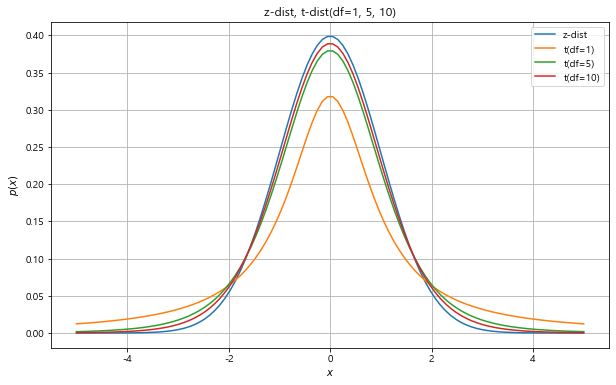

In [4]:
#collapse
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
rv_norm = sp.stats.norm(loc=0, scale=1)
rv_t10 = sp.stats.t(df=10)
rv_t5 = sp.stats.t(df=5)
rv_t1 = sp.stats.t(df=1)

norm_pdf = rv_norm.pdf(x)
t10_pdf = rv_t10.pdf(x)
t5_pdf = rv_t5.pdf(x)
t1_pdf = rv_t1.pdf(x)

legend = ['z-dist', 't(df=1)', 't(df=5)', 't(df=10)']

plt.figure(figsize = (10, 6)) 
plt.plot(x, norm_pdf)
plt.plot(x, t1_pdf)
plt.plot(x, t5_pdf)
plt.plot(x, t10_pdf)

plt.title("z-dist, t-dist(df=1, 5, 10)")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.grid()
plt.legend(legend)
plt.show()

`-` 위의 plot을 보면 자유도가 커질수록 t분포가 표준정규분포에 가까워짐을 알 수 있음

`-` 나중에 plot그리는데 사용되는 lib와 사용법 추가 예정

## t 분포 사용 조건 

`-` 표본 크기 $n\geq 30$이면 문제 없음

`-` 만약 표본 크기 $n$이 작다면? ---> 모집단이 정규분포를 따라야 함

`-` 근데 모집단이 정규분포 따르는지 모른다 ---> 대신에 표본이 정규분포를 따르는지 확인하자 ---> shapiro.test 실시

`-` 표본에 이상점이 있거나 비대칭이면 t 분포 사용$\times$ 

`-` 표본이 정규분포를 따르는 것 같다 ---> $\bar{x}$의 분포는 정규분포를 따른다 ---> t-test 실시해도 괜찮다

## 평균에 대한 t검정 

`-` 영가설 $H_0:\mu=\mu_0$를 검정하는 t-통계량은 다음과 같음

`-` $t=\cfrac{\bar{x}-\mu_0}{\frac{s}{\sqrt{n}}}$

`-` $\bar{x}$는 표본 평균, $s$는 표본에서 계산한 표준편차

`-` p-값을 통해 영가설을 기각할지 기각하지 못하는지를 결정 ---> 가설검정 용어(영가설, p-값 등등)에 대해 나중에 정리 예정

`-` 검증의 p-값은 자유도가 $n-1$인 t분포에서 대안가설에 적절한 꼬리쪽의 비율을 계산

### 평균에 대한 t검정 예제 

- 문제

`-` 사람의 평균 체온이 $36.5^{°}\mathrm{C}$인지 검정하기 위해 건강한 사람 50명의 체온을 재었다

`-` 임의로 데이터를 설정하여 평균 체온 데이터는 평균이 36.3, 표준편차는 0.5인 정규분포에서 추출했음 

`-` 임의로 뽑은 표본을 살펴보니 $\bar{x} = 36.35,\;s=0.5$이다

`-` 위의 데이터는 사람의 평균 체온이 $36.5^{°}\mathrm{C}$와는 다르다는 증거인지 유의수준 $\alpha=0.05$ 에서 검정하자

- 해결 과정

`-` $H_0:\mu=36.5,\;H_a:\mu\neq36.5$  

`-` 표본 크기가 충분하고 표본에 대한 히스토그램을 보면 정규분포를 따르는 것으로 보인다 

In [25]:
import rpy2
import os

os.environ['R_HOME']='C:/anaconda3/envs/py38r40/lib/R' 
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


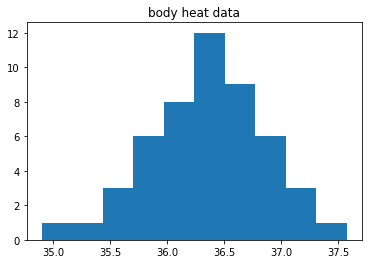

In [21]:
import matplotlib.pyplot as plt
import numpy as np

## 예시 샘플
np.random.seed(2021)
sample = np.random.normal(loc = 36.3, scale = 0.5, size = 50)

plt.hist(sample)
plt.title('body heat data')
plt.show()

%R -i sample

`-` 샤피로 윌크 검정을 통해 정규성을 정확히 확인하자

In [25]:
%%R
shapiro.test(sample)


	Shapiro-Wilk normality test

data:  sample
W = 0.98456, p-value = 0.7524



`-` p-값이 크므로 영가설(표본은 정규분포를 따름)을 기각할 수 없으므로 표본의 정규성을 가정

`-` t통계량을 직접 구해도 됨 ---> $t=\cfrac{\bar{x}-\mu_0}{\frac{s}{\sqrt{n}}} = \cfrac{36.35-36.5}{\frac{0.5}{\sqrt{50}}}=-2.12$

`-` 하지만 매번 직접 구하기 귀찮으므로 R을 통해 구해보도록 하자 + p-값도 구해줌

`-` 사실 파이썬으로도 가능하지만 내가 모르는 관계로 R로 하고 나중에 따로 공부하자

In [15]:
%%R
print(mean(sample)) ## 평균
print(sd(sample)) ## 분산

[1] 36.35498
[1] 0.5006206


In [16]:
%%R
t.test(sample, mu = 36.5, alternative = 'two.sided', conf.level = 0.95)


	One Sample t-test

data:  sample
t = -2.0483, df = 49, p-value = 0.04591
alternative hypothesis: true mean is not equal to 36.5
95 percent confidence interval:
 36.21271 36.49726
sample estimates:
mean of x 
 36.35498 



`-` p-값을 보면 0.04591로 유의수준인 0.05보다 작음 ---> 영가설을 기각한다

`-` 따라서 표본에 따르면 사람의 평균 체온은 $36.5^{°}\mathrm{C}$와 다르다고 할 수 있다

`-` 임의로 만든 표본은 평균이 36.3인 정규분포에서 추출한 것이므로 올바르게 추론한 것을 알 수 있음

## 평균 차이 분포 
`-` 단일 평균에 대한 t검정과 차이점은 표본이 하나인가 둘인가이다

`-` 평균 차이에 대한 t검정에서 관심있는 모수는 $\mu_1 - \mu_2$이다

`-` 평균이 $\mu_1$과 $\mu_2$인 모집단에서 표본크기가 $n_1$과 $n_2$인 무작위 표본을 얻었을 때 표본 평균 차이 $\bar{x_1}-\bar{x_2}$의 분포는 중심이 모집단 평균 차이$\mu_1-\mu_2$이고 표준오차는 {% raw %} $\sqrt{\frac{{s_1}^{2}}{n_1}+\frac{{s_2}^2}{n_2}}$이다{% endraw %}

`-` 표본 평균 차이를 표준화한 값은 t분포를 따르며 자유도는 근사적으로 $n_1+n_2-2$

`-` $n_1 <30$ or $n_2<30$인 경우 표본 크기가 작으며 이 경우에는 모집단이 정규분포를 따라야 함

`-` 평균 차이를 검정할 땐 두 집단이 서로 독립인지 아닌지가 중요함 ---> 독립여부에 따라 검정 방법이 달라짐

`-` 여기서는 독립표본에 대해 얘기할 것 임

`-` 두 집단의 분산의 동질성이 중요함 ---> 평균 차이 검정을 하기 전에 분산의 동질성 검정을 수행함

`-` 분산이 같은 경우 student's t-test를 사용하고 분산이 다른 경우 Welch's t test사용함

## 평균 차이에 대한 t검정
`-` 영가설 $H_0:\mu_1-\mu_2=0$를 검정하는 t-통계량은 다음과 같음

`-` {% raw %}$t=\cfrac{(\bar{x_1}-\bar{x_2})-0}{\sqrt{\frac{{s_1}^2}{n_1}+\frac{{s_2}^2}{n_2}}}${% endraw %}

`-` $\bar{x_1}$과 $\bar{x_2}$는 표본 평균, $s_1$과 $s_2$는 표본의 표준편차

### 평균 차이에 대한 t검정 예제

- 문제

`-` 남자의 평균 체온$(\bar{x_1})$과 여자의 평균 체온$(\bar{x_2})$이 다른지 검정하기 위해 각각 건강한 사람 50명의 체온을 재었다

`-` 임의로 데이터를 설정하여 남자의 평균 체온 데이터는 평균이 36.5, 표준편차는 0.4인 정규분포에서 추출했음 

`-` 임의로 데이터를 설정하여 여자의 평균 체온 데이터는 평균이 36.45, 표준편차는 0.5인 정규분포에서 추출했음 

`-` 임의로 뽑은 표본을 보니 $\bar{x_1} = 36.54,\;\bar{x_2} = 36.5,\; s_1=0.4,\;s_2=0.53$이다

`-` 위의 데이터는 남자와 여자의 평균 체온이 서로 다르다는 증거인지 유의수준 $\alpha=0.05$ 에서 검정하자

- 해결 과정

`-` $H_0:\mu_1-\mu_2 = 0,\;H_a:\mu_1\neq\mu_2$  
        
`-` 표본 크기가 충분하고 표본에 대한 히스토그램을 보면 정규분포를 따르는 것으로 보인다 

`-` 남자 모집단과 여자 모집단에서 표본을 추출했으므로 두 표본은 서로 독립이다

In [1]:
import rpy2
import os

os.environ['R_HOME']='C:/anaconda3/envs/py38r40/lib/R' 
%load_ext rpy2.ipython

C:\anaconda3\envs\py38r40\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


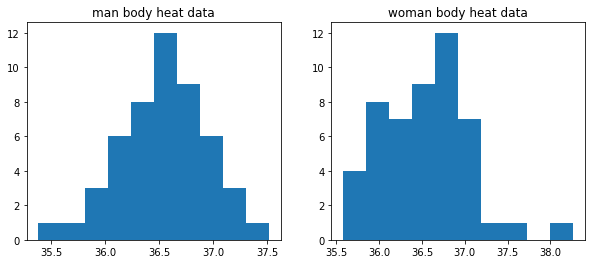

In [7]:
import matplotlib.pyplot as plt
import numpy as np

## 예시 샘플
np.random.seed(2021)
man_heat = np.random.normal(loc = 36.5, scale = 0.4, size = 50)
woman_heat = np.random.normal(loc = 36.45, scale = 0.5, size = 50)

fig, ax = plt.subplots(1, 2, figsize = (10, 4))

ax[0].hist(man_heat)
ax[1].hist(woman_heat)

ax[0].set_title('man body heat data')
ax[1].set_title('woman body heat data')

plt.show()

%R -i man_heat,woman_heat

`-` 두 표본이 정규성을 따르는지 정확히 확인하자

In [26]:
%%R
shapiro.test(man_heat)


	Shapiro-Wilk normality test

data:  man_heat
W = 0.98456, p-value = 0.7524



In [27]:
%%R
shapiro.test(woman_heat)


	Shapiro-Wilk normality test

data:  woman_heat
W = 0.96223, p-value = 0.1102



`-` 둘다 p-값이 크므로 정규성을 가정하자

`-` 평균 차이 검정을 하기전에 우선 두 표본의 분산이 동일한지 검정하자

`-` var.test는 두 집단의 분산이 동일한지 비교함 ratio(두 집단 분산의 비율)이 1이 아니라면 두 집단의 분산이 다르다는 증거임

In [18]:
%%R
print(mean(man_heat))
print(sd(man_heat))
print(mean(woman_heat))
print(sd(woman_heat))

[1] 36.54399
[1] 0.4004965
[1] 36.52622
[1] 0.5260057


In [19]:
%%R
var.test(man_heat, woman_heat, ratio = 1, alternative = "two.sided", conf.level = 0.95)


	F test to compare two variances

data:  man_heat and woman_heat
F = 0.57972, num df = 49, denom df = 49, p-value = 0.05916
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3289758 1.0215715
sample estimates:
ratio of variances 
         0.5797175 



`-` 두 집단의 분산이 같은지 검정하니 p-값이 0.05보다 크기 때문에 다르다고 할만한 충분한 증거가 없으므로 동일하다 가정함

`-` 분산이 각각 0.4와 0.5인 집단에서 표본을 추출하여 원래는 분산이 다르지만 표본크기가 작기 때문에 0.1의 차이를 판단하지 못하였음

`-` 아무튼 var.test 결과는 분산이 동일하다 나왔으므로 두 집단의 분산이 동일하다 생각하고 평균 차이를 검정하자

In [20]:
%%R
t.test(man_heat, woman_heat, alternative = 'two.sided', var.equal = T, conf.level = 0.95)


	Two Sample t-test

data:  man_heat and woman_heat
t = 0.19001, df = 98, p-value = 0.8497
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1677758  0.2033056
sample estimates:
mean of x mean of y 
 36.54399  36.52622 



`-` 검정결과를 보면 p-값이 0.05보다 크므로 영가설을 기각하지 못함 ---> 남자와 여자의 평균체온을 다르다고 할 수 없음

`-` 실제 데이터는 평균이 36.5와 36.45로 다르지만 표본의 크기가 충분하지 않아 이를 잡아내지 못함

`-` 표본 크기가 50이 아니라 더욱 커진다면 위의 차이를 알아낼 수 있음

## 대응표본에 대한 평균 차이 t검정

`-` 위에서 두 개의 개별 표본일 때 평균 차이 검정을 했음

`-` 하지만 자료가 짝으로 주어졌다면 위와 동일한 방법으로 검정을 수행하면 안됨

`-` 짝 자료 ---> 동일한 피실험체를 두 가지 다른 조건에서 측정한 데이터 ex) 개별 사람의 왼손과 오른손 악력, 약을 복용하기 전과 후의 혈압

`-` 조건이 동일하다면 동일한 피실험체가 아니어도 가능함 ---> ex) 일란성 쌍둥이의 IQ

`-` 짝 자료에 대한 평균 차이 검정은 우선 각 짝 자료의 차이를 계산한 후 차이에 대한 평균 $\bar{x_d}$, 표준편차 $s_d$, 표본 크기 $n_d$를 계산

`-` {% raw %}$t =\cfrac{\bar{x_d} - 0}{\frac{s_d}{\sqrt{n_d}}}${% endraw %}를 자유도가  $n_d-1$인 t분포에서 검정함

### 대응 표본에 대한 평균 차이 t검정 예제

- 문제

`-` 소설을 읽을 때 스토리 스포일러를 포함한 경우와 그렇지 않은 경우에 대해 즐거움의 등급(점수)차이가 있는지 유의수준 $\alpha=0.05$ 에서 검정하자

`-` 등급이 높을 수록 스토리가 더 재밌었다는 것을 의미함

`-` 12개 스토리의 각 버전은 최소 30명이 읽고 1~10등급으로 등급을 매겼음

`-` 스포일러 유 ---> 4.7, 5.1, 7.9, 7.0, 7.1, 7.2, 7.1, 7.2, 4.8, 5.2, 4.6, 6.7

`-` 스포일러 무 ---> 3.8, 4.9, 7.4, 7.1, 6.2, 6.1, 6.7, 7.0, 4.3, 5.0, 4.1, 6.1

- 해결 과정

`-` 12개의 스토리를 동일한 조건(무작위 샘플링)을 지닌 사람이 두 가지 처리(스포일러 유무)를 받아 읽고 등급을 평가함 ---> 대응 표본

In [1]:
import rpy2
import os

os.environ['R_HOME']='C:/anaconda3/envs/py38r40/lib/R' 
%load_ext rpy2.ipython

C:\anaconda3\envs\py38r40\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
%%R
install.packages('ggplot2')
library(ggplot2)

--- Please select a CRAN mirror for use in this session ---


R[write to console]: trying URL 'https://cran.seoul.go.kr/bin/windows/contrib/4.0/ggplot2_3.3.5.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 4129414 bytes (3.9 MB)

R[write to console]: downloaded 3.9 MB




package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\tmp\Rtmp0OKRvu\downloaded_packages


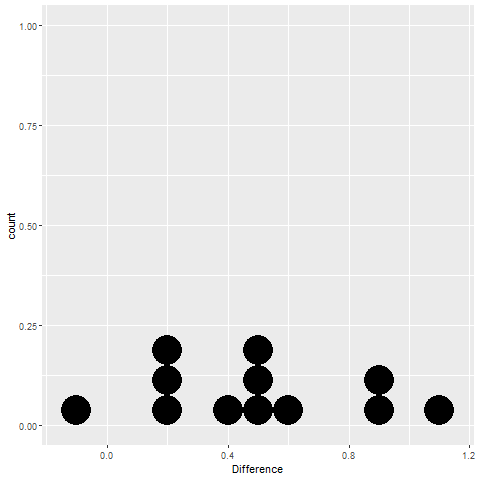

In [15]:
%%R
with_spoiler <- c(4.7, 5.1, 7.9, 7.0, 7.1, 7.2, 7.1, 7.2, 4.8, 5.2, 4.6, 6.7)
original <- c(3.8, 4.9, 7.4, 7.1, 6.2, 6.1, 6.7, 7.0, 4.3, 5.0, 4.1, 6.1)
diff <- with_spoiler - original
diff_df <- as.data.frame(diff)

ggplot(diff_df, aes(x = diff)) + xlab('Difference') + geom_dotplot(binwidth = 0.1)

`-` 짝 자료 차이에 대한 점도표를 보면 정규분포를 부정할 만한 비대칭이나 이상점은 없어보임

In [12]:
%%R
shapiro.test(diff)


	Shapiro-Wilk normality test

data:  diff
W = 0.95506, p-value = 0.7116



`-` 샤피로 윌크 검정도 해보니 정규분포임을 가정해도 괜찮아 보임

In [13]:
%%R
t.test(with_spoiler, original, paired = T, alternative = 'two.sided', conf.level = 0.95)


	Paired t-test

data:  with_spoiler and original
t = 4.8997, df = 11, p-value = 0.0004719
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2708052 0.7125281
sample estimates:
mean of the differences 
              0.4916667 



`-` R에서 대응 표본에 대한 검정을 하려면 `paried = T` 옵션을 적용한다

`-` p-값이 0.0004719로 매우 작으므로 영가설을 기각하자 ---> 스포일러 유무에 따른 재미의 등급은 차이가 있다!

# 모분산에 대한 추론

`-` 모집단이 얼마나 퍼져있는지에 대해 궁금할 수 있음

`-` ex) 공장에서 생산하는 과자의 무게

`-` 과자의 무게 변동이 큰지 작은지에 대한 검정이 모분산에 대한 검정이다

## 단일 모분산에 대한 검정

`-` 우선 단일 모분산에 대한 검정에는 $\chi^2$분포가 사용됨 ---> 왜?

`-` 카이제곱분포를 떠올려보면 다음과 같음

`-` $n$개의 서로 독립인 확률표본이 평균 $\mu$ 분산 $\sigma^2$인 정규분포에서 추출되었다고 하자

`-` 모평균이 알려져 있지 않은 상황에서는 $\mu$ 대신 $\bar{X}$를 사용함

$$\begin{aligned}\sum Z_{i}^{2}&=\left(\cfrac{X_1-\bar{X_n}}{\sigma}\right)^2 + \left(\cfrac{X_2-\bar{X_n}}{\sigma}\right)^2+\cdots+\left(\cfrac{X_n-\bar{X_n}}{\sigma}\right)^2\\
&=\cfrac{1}{\sigma^2}\sum(X_i-\bar{X_n})^2\\[10pt]
&=\chi^2_{n-1}\end{aligned}$$

`-` 그런데 $s^2=\cfrac{1}{n-1}\sum(X_i-\bar{X_n})^2$ 이므로 $\chi^2_{n-1}=\cfrac{(n-1)s^2}{\sigma^2}$ 이다

`-` 따라서 $\cfrac{(n-1)s^2}{\sigma^2}$의 표본분포는 자유도가 $n-1$인 $\chi^2_{n-1}$분포를 하고 있다

`-` $X^2$분포가 어떻게 생겼는지 그래프를 그려서 확인해보자

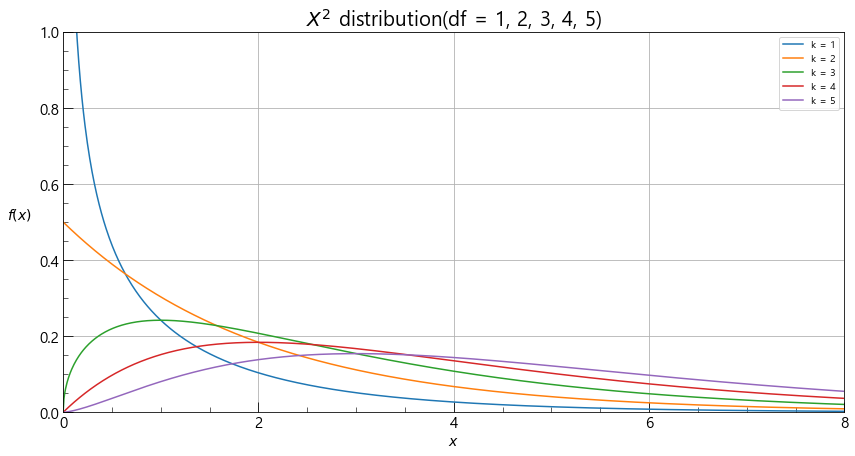

In [7]:
#collapse
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import chi2

fig, ax = plt.subplots(figsize = (14, 7))
x = np.linspace(0, 8, 1000)

for df in np.arange(1, 6):
    ax.plot(x, chi2(df).pdf(x), label = 'k = ' + str(df))

major_xticks = np.arange(0.0, 9.0, 2.0)
minor_xticks = np.arange(0.5, 8.0, 0.5)
major_yticks = np.arange(0, 1.2, 0.2)
minor_yticks = np.arange(0.05, 1.0, 0.05)

ax.set_title("$X^2$ distribution(df = 1, 2, 3, 4, 5)", fontsize = 20)
ax.set_ylim(0, 1)
ax.set_xlim(0, 8)
ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor = True)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor = True)
ax.set_xlabel("$x$", fontsize = 14)
ax.set_ylabel("$f(x)$", fontsize = 14, rotation = 0, labelpad = 20)
ax.tick_params(axis = 'both', labelsize = 15, length = 10, direction = 'in')
ax.tick_params(axis = 'both', which = 'minor', length = 5, direction = 'in')
ax.grid()
ax.legend()
plt.show()

`-` 정규분포와 t분포와 다르게 오른쪽으로 꼬리가 긴 분포이다

`-` $\cfrac{(n-1)s^2}{\sigma^2}$의 표본분포는 위의 그래프처럼 자유도에 따라 달라짐

`-` 단일모분산을 검정하는 검정통계량은 다음과 같음

$$\chi^2_{n-1}=\cfrac{(n-1)s^2}{\sigma^2}$$

`-` 가설 $H_0 : \sigma^2 = \sigma_0^2$ 에 대한 검정은 대안가설 부호에 따라 다름

$$\begin{aligned}H_a &: \sigma^2>\sigma_0^2\longrightarrow \chi^2<\chi^{2}_{\alpha}\\
H_a &: \sigma^2<\sigma_0^2\longrightarrow \chi^2>\chi^2_{1-\alpha}\\
H_a &: \sigma^2\neq\sigma_0^2\longrightarrow \chi^2<\chi^2_{1-\frac{\alpha}{2}}\; or\; \chi^2>\chi^2_{\frac{\alpha}{2}}\end{aligned}$$

`-` 이때 $\chi^2_{\alpha}$은 분포의 오른쪽 확률이 $\alpha$임을 나타낸다

`-` 위가 성립하면 귀무가설 $H_0$를 기각한다

### 단일 모분산에 대한 검정 예제

`-` 임의로 샘플을 만들고 모분산에 대해 검정해보자

In [105]:
import numpy as np

np.random.seed(2021)
data = np.random.normal(0, 2, 10) 

`-` 평균이 0이고 분산이 4인 정규분포에서 10개의 샘플을 뽑았다

`-` 샘플을 가지고 $\alpha = 0.05$에서 모분산이 3를 넘는지 검정해보자

$$H_0 :  \sigma^2 = 3\\
H_a : \sigma^2 > 3$$ 

In [111]:
var_0 = 3
n = len(data)
df = n - 1
s = np.std(data, ddof = 1)
chi_square = (n-1) * (s**2) / var_0 ## 검정통계량

In [114]:
s ## 표분편차는 1.52

1.5249196358322268

`-` 검정통계량(chi2)이 $\chi^2_{0.05}$ 보다 크면 영가설을 기각할 수 있다

In [117]:
from scipy.stats import chi2

X_square = chi2.ppf(0.95, df) ## 카이제곱분포의 오른쪽 영역이 0.05(왼쪽 영어은 0.95)가 되게하는 x 값 ## 누적분포의 역함수(ppf)를 통해 구한다

In [118]:
X_square

16.918977604620448

In [119]:
chi_square

6.9761396872400745

In [120]:
X_square < chi_square

False

`-` 검정통계량이 기각역보다 크지 않으므로 영가설을 기각할 수 없다

`-` 따라서 모분산은 3보다 크다고 말할 수 없다

`-` 분산이 4인 정규분포에서 샘플을 뽑았지만 영가설을 기각하지 못했음

`-` 표본크기가 10으로 작아 변동성이 커 샘플의 분산이 2.32 이기 때문임

`-` 표본크기가 더 크다면 영가설을 기각할 수 있을 것이다

## 두 모집단분산 차이에 대한 검정

`-` 두 모집단의 분산을 비교하는데에는 F분포를 사용함 ---> 왜?